<font color="forestgreen">
# Motivation
We would like to apply our algorithm to a commonplace need such as classifying popular political figures on their words.
# Contents
<ol>
<li><a href="#Libraries">Libraries</a></li>
<li><a href="#Twitter-Data">Twitter Data</a></li>
<li><a href="#Random-Forest-Algorithm">Random Forest Algorithm</a></li>
<li><a href="#Assembling-Dataframe">Assembling Dataframe</a></li>
</ol>

# Libraries
Here are the libraries we used.

In [19]:
# LIBRARIES
# TEXT PROCESSING
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# DATA SCIENCE
import pandas as pd
import numpy as np

# VISUALIZATION
from wordcloud import WordCloud
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
plt.style.use("ggplot")

# ELSE
from collections import Counter
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

<font color="forestgreen">
# Twitter Data
We ripped the most recent 20 tweets from the following Twitter profiles: Donald Trump (@POTUS), Betsy Devos, Kellyanne Conway, Mike Pence, Mitt Romney, Jeb Bush, Milo Yiannopoulos, Sarah Palin, Ted Cruz, Jerry Brown, Jill Stein, Barack Obama, Joe Biden, Bernie Sanders, Hillary Clinton, Robert Reich, Justin Trudeau, Nate Silver, NYT Politics, CNN Politics, FOX Politics, Post Politics, and We the People.
<br><br>
The language in tweets is different but not distinctly different from that of petitions. We believe that testing on Twitter data may lead to interested language-choice insights about certain political sources. I chose 20 profiles that I thought may be interesting.

In [20]:
twitter_data = pd.DataFrame.from_csv("data/twitter_data.csv")
twitter_data.head(10)

,profile,url,tweet_bags
0,Donald Trump,https://twitter.com/POTUS,"FBI Director Comey: fmr. DNI Clapper ""right"" t..."
1,Betsy Devos,https://twitter.com/BetsyDeVosED,"#NASBE CEO Kris Amundson reiterates ""nothing s..."
2,Kellyanne Conway,https://twitter.com/KellyannePolls,Congratulations @erictrump & @LaraLeaTrump on ...
3,Mike Pence,https://twitter.com/mike_pence,.@POTUS showed true leadership in his #JointAd...
4,Mitt Romney,https://twitter.com/MittRomney,I'm a fan of proposed Deputy Treasury Secretar...
5,Jeb Bush,https://twitter.com/JebBush,Such an unnecessary distraction given all the ...
6,Milo Yiannopoulos,https://twitter.com/DontGoAwayM4d,http://bit.ly/2mRyeJq? via /r/KiA #gamergate K...
7,Sarah Palin,https://twitter.com/SarahPalinUSA,JUST In... http://fb.me/124E4KuhZ? This is maj...
8,Ted Cruz,https://twitter.com/tedcruz,Add your name if you agree -- no US funding fo...
9,Jerry Brown,https://twitter.com/JerryBrownGov,"California is Not Turning Back, Not Now, Not E..."


In [21]:
# FUNCTION TO CLEAN UP BODY TEXT
def cleanUpText(text, additional_stopwords=[]):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    # REMOVE URLS
    new_text = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*", "", new_text).strip()
    # REMOVE PUNCTUATION
    new_text = new_text.translate(None, string.punctuation)
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    # LOWERCASE
    new_text = new_text.lower()
    #SPLIT
    new_text = new_text.split()
    # REMOVE STOPWORDS
    stops = stopwords.words("english") + additional_stopwords
    return [word for word in new_text if word not in stops]


# FUNCTION TO CLEAN UP TITLE TEXT
def cleanUpTitle(text):
    # REMOVE MARK UP
    new_text = text.replace("\r", "").replace("\n", "")
    # REMOVE NUMBERS
    new_text = re.sub(r"\d+", "", new_text)
    # LOWERCASE
    new_text = new_text.lower()
    return(new_text)

In [22]:
# READ IN DATA TO TRAIN MODEL
petnlp = pd.DataFrame.from_csv("data/petnlp.csv")
# REMOVE THE NEUTRALS
petnlp = petnlp[petnlp["ideology"]!="Neutral"]

In [24]:
# CLEAN UP TITLES
cleaned_titles = [cleanUpTitle(x) for x in petnlp["title"]]

# DEFINE NEW STOP WORDS
new_stops = "President, president, people, without, needs, since, used, get, would, us, united, states, people, american, americans, national, government, petition, make, also, many, must, need, change, ask, use, every, trump, white, house, america, America, executive, Executive"
new_stops = new_stops.split(", ")

# CLEAN UP BODY TEXT
tokens = [cleanUpText(x, new_stops) for x in petnlp["body"]]
blobs = [unicode(" ".join(x), errors="replace") for x in tokens]
blobs = [x.encode("ascii", "replace") for x in blobs]
blobs_df = pd.DataFrame({"title":cleaned_titles, "blobs":blobs, "ideology":petnlp["ideology"]})


# REMOVE THE NULLS
index = blobs_df["ideology"].index[blobs_df["ideology"].apply(pd.isnull)]
blobs_df = blobs_df[~pd.isnull(blobs_df["ideology"])]
blobs_df = blobs_df.reset_index(drop=True)

C:\Users\ehze\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [30]:
# COLLECT TRAINING DATA INDICES
# len(blobs_df)*0.8 = 174.4
# pseudo_rando_nums = random.sample(range(0, len(blobs_df)-1), 174)
# train = pseudo_rando_nums

train = [141, 182, 9, 158, 41, 43, 145, 193, 58, 173, 53, 24, 177, 48, 46, 76, 128, 8, 14, 127, 30, 111, 82, 149, 150, 74, 99, 56, 188, 67, 61, 36, 174, 195, 54, 105, 202, 186, 212, 172, 78, 47, 184, 38, 137, 122, 151, 214, 216, 136, 143, 161, 159, 45, 140, 138, 77, 115, 79, 86, 33, 205, 168, 93, 126, 69, 165, 12, 152, 37, 91, 26, 121, 95, 2, 21, 104, 75, 81, 142, 5, 6, 80, 199, 15, 16, 181, 72, 157, 68, 64, 90, 3, 103, 146, 191, 198, 197, 194, 189, 25, 154, 22, 148, 190, 19, 31, 153, 113, 87, 40, 162, 98, 166, 110, 92, 84, 116, 183, 4, 109, 49, 178, 147, 119, 101, 123, 134, 155, 29, 201, 34, 187, 60, 206, 208, 39, 100, 102, 118, 130, 51, 27, 131, 23, 200, 210, 65, 129, 63, 88, 160, 20, 156, 171, 97, 133, 185, 0, 203, 44, 59, 163, 57, 144, 73, 167, 139, 215, 52, 10, 17, 62, 120]

In [31]:
# VECTORIZING TRAINING DATA
vectorizer = CountVectorizer(analyzer= "word",
                            tokenizer = None,
                            preprocessor = None,
                            stop_words = None,
                            max_features = 5000)
train_data_features = vectorizer.fit_transform(blobs_df["blobs"][train])
train_data_features = train_data_features.toarray()


# GENERATE OUR FOREST
forest = RandomForestClassifier(n_estimators = 100)
our_forest = forest.fit(train_data_features, blobs_df["ideology"][train])

In [36]:
# DEFINE NEW STOP WORDS
new_stops = "President, president, people, without, needs, since, used, get, would, us, united, states, people, american, americans, national, government, petition, make, also, many, must, need, change, ask, use, every, trump, white, house, america, America, executive, Executive"
new_stops = new_stops.split(", ")

# TOKENS
tokens = [cleanUpText(x, new_stops) for x in twitter["tweet_bags"]]

blobs = [unicode(" ".join(x), errors="replace") for x in tokens]
blobs = [x.encode("ascii", "replace") for x in blobs]

In [38]:
twitter["blobs"] = blobs
twitter

,profile,url,tweet_bags,blobs
0,Donald Trump,https://twitter.com/POTUS,"FBI Director Comey: fmr. DNI Clapper ""right"" t...",fbi director comey fmr dni clapper right say e...
1,Betsy Devos,https://twitter.com/BetsyDeVosED,"#NASBE CEO Kris Amundson reiterates ""nothing s...",nasbe ceo kris amundson reiterates nothing sho...
2,Kellyanne Conway,https://twitter.com/KellyannePolls,Congratulations @erictrump & @LaraLeaTrump on ...,congratulations erictrump laraleatrump best ne...
3,Mike Pence,https://twitter.com/mike_pence,.@POTUS showed true leadership in his #JointAd...,potus showed true leadership jointaddresslayin...
4,Mitt Romney,https://twitter.com/MittRomney,I'm a fan of proposed Deputy Treasury Secretar...,im fan proposed deputy treasury secretary jim ...
5,Jeb Bush,https://twitter.com/JebBush,Such an unnecessary distraction given all the ...,unnecessary distraction given challenges oppor...
6,Milo Yiannopoulos,https://twitter.com/DontGoAwayM4d,http://bit.ly/2mRyeJq? via /r/KiA #gamergate K...,via rkia gamergate kotaku uks rich stanton out...
7,Sarah Palin,https://twitter.com/SarahPalinUSA,JUST In... http://fb.me/124E4KuhZ? This is maj...,major beautiful way teach kids voters election...
8,Ted Cruz,https://twitter.com/tedcruz,Add your name if you agree -- no US funding fo...,add name agree funding un israel vote reversed...
9,Jerry Brown,https://twitter.com/JerryBrownGov,"California is Not Turning Back, Not Now, Not E...",california turning back ever casotspictwitterc...


In [62]:
new_text__data_features = vectorizer.transform(twitter["blobs"])
new_text__data_features = new_text__data_features.toarray()
new_text__data_features


# PREDICT NEW TEXT DATA
new_text_result = forest.predict(new_text__data_features)

# PREDICTED NEW TEXT DATA PROBABILITIES
new_text_predicted_probs = forest.predict_proba(new_text__data_features)
results_df = pd.DataFrame(new_text_predicted_probs, twitter["profile"])
results_df.columns = ["conservative", "liberal"]
results_df["score"] = results_df["liberal"] - results_df["conservative"]
results_df["prediction"] = results_df.idxmax(axis=1)
results_df["label_pos"] = [1,2,3,4]*5 + [1,2, 3]
results_df = results_df.sort_values(by="score")
results_df

,conservative,liberal,score,prediction,label_pos
profile,,,,,
Robert Reich,0.72,0.28,-0.44,conservative,4
Donald Trump,0.63,0.37,-0.26,conservative,1
NYT Politics,0.63,0.37,-0.26,conservative,3
Mitt Romney,0.58,0.42,-0.16,conservative,1
Betsy Devos,0.57,0.43,-0.14,conservative,2
Kellyanne Conway,0.57,0.43,-0.14,conservative,3
Jerry Brown,0.57,0.43,-0.14,conservative,2
Bernie Sanders,0.55,0.45,-0.10,conservative,2
Joe Biden,0.53,0.47,-0.06,conservative,1


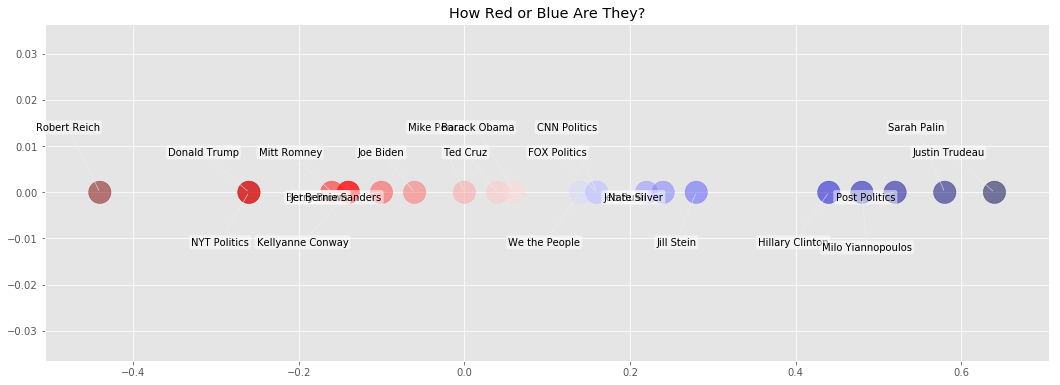

In [92]:
# USING MATPLOTLIB
plt.rcParams['figure.figsize'] = (18, 6)

x = results_df["score"]
y = [0]*len(x)
colors = x

plt.subplots_adjust(bottom = 0.1)
plt.scatter(x, y, marker = "o", c=colors, cmap=plt.cm.seismic_r, s=500, alpha=0.5)

for pos, label, x, y in zip(results_df["label_pos"], results_df.index.values, x, y):
    if pos==1:
        xytext = (-10, 35)
    if pos==2:
        xytext = (0, -10)
    if pos==3:
        xytext = (0, -55)
    if pos==4:
        xytext = (0, 60)
    if label=="Milo Yiannopoulos":
        xytext = (50, -60)
    plt.annotate(
        label,
        xy=(x, y), xytext=xytext,
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round, pad=0.2', fc="white", alpha=0.5),
        arrowprops=dict(arrowstyle = '-', connectionstyle='arc3, rad=0'))

plt.title("How Red or Blue Are They?")
plt.show()